# Estadística sobre las Trayectorias.
Varias medidas en busca de significado estadístico de los cálculos de las trayectorias de los Centros de Masa, definidos en el Notebook TrackingtheTracks.

In [1]:
using JLD
using PyPlot
using StatsBase

┌ Info: Recompiling stale cache file /home/karel/.julia/compiled/v1.0/StatsBase/EZjIG.ji for StatsBase [2913bbd2-ae8a-5f71-8c99-4fb6c76f3a91]
└ @ Base loading.jl:1184


In [2]:
Datos=load("../JLDFiles/TrabajandoCentrosdeMasa/140116s2cut2_evento_2-Tray.jld")

Dict{String,Any} with 2 entries:
  "CatenarioPositivo" => Dict{Integer,Array{Any,N} where N}(288=>[54.8467 51.07…
  "CatenarioNegativo" => Dict{Integer,Array{Any,N} where N}(288=>[59.8269 18.16…

In [3]:
CatenarioPozos=Datos["CatenarioNegativo"]
CatenarioFuentes=Datos["CatenarioPositivo"];

In [4]:
include("TrayectoriasAux.jl")

distprom (generic function with 1 method)

In [5]:
dispozos=distprom(CatenarioPozos);
disfuentes=distprom(CatenarioFuentes)
length(disfuentes)

485

In [12]:
distie=42 #distancia inter electrodo
freq=7.022
cajas=0:25:400

tantos=length(dispozos)
vspozos=zeros(tantos)


for j in 1:tantos
    vspozos[j]=dispozos[j]
end
# la vs esta en unidades "de la MEA", asi que... escalas
vspozos=vspozos*distie*freq;
histvpozos=fit(Histogram, vspozos, cajas,closed=:right)

tantos=length(disfuentes)
vsfuentes=zeros(tantos)
for j in 1:tantos
    vsfuentes[j]=disfuentes[j]
end
# la vs esta en unidades "de la MEA", asi que... escalas

vsfuentes=vsfuentes*distie*freq;
histvfuentes=fit(Histogram, vsfuentes, cajas,closed=:right)


StatsBase.Histogram{Int64,1,Tuple{StepRange{Int64,Int64}}}
edges:
  0:25:400
weights: [13, 37, 42, 61, 78, 90, 63, 40, 23, 19, 8, 8, 1, 0, 1, 0]
closed: right
isdensity: false

In [15]:
centroshistopozos=(histvpozos.edges[1][2:end]+histvpozos.edges[1][1:end-1])/2
centroshistofuentes=(histvfuentes.edges[1][2:end]+histvfuentes.edges[1][1:end-1])/2

ancho=15


15

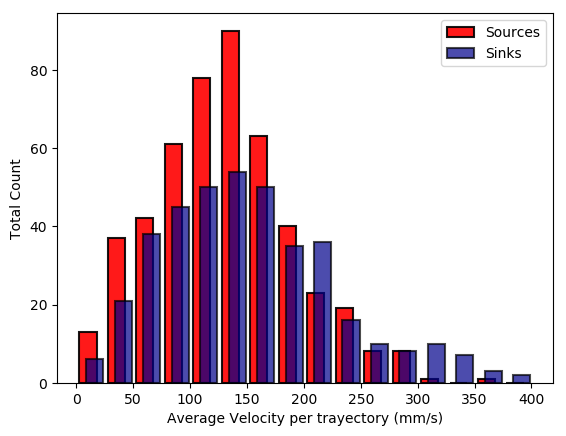

In [19]:

fu=figure(size(7,4))
xlabel("Average Velocity per trayectory (mm/s)")
ylabel("Total Count")

bar(centroshistofuentes-2, histvfuentes.weights, ancho, color="red", alpha=0.9, edgecolor="black", lw=1.5, label="Sources")
bar(centroshistopozos+4, histvpozos.weights, ancho, color="darkblue", alpha=0.7, edgecolor="black", lw=1.5, label="Sinks")
legend()
savefig("HistogramVelocities01.svg",dpi=90)

In [17]:
mean(vspozos), mean(vsfuentes)

(150.19308250125616, 130.70793577401994)

In [21]:
std(vspozos), std(vsfuentes)

(76.25092156966276, 62.497119748289286)

In [5]:

function distanciasAcumuladas(cadena::Array)
    jmax,bla=size(cadena)
    result=zeros(jmax)
    acu=0
    for j=1:jmax-1
        acu+=dist2D(cadena[j,:],cadena[j+1,:])
        result[j+1]=acu
    end
    return result
end

distanciasAcumuladas (generic function with 1 method)

In [6]:
PyPlot.ion()
figure(figsize=(9,8))
#axis("equal")
#xlim(0.0,25.0)
ylim(0.0,465.0)

for p in CadenasPozos
    offset=p[1,4]/100
    xxpos=distanciasAcumuladas(p)+offset
    yypos=map(x->abs(x), p[:,3])
    plot(xxpos,yypos)
end

LoadError: [91mUndefVarError: CadenasPozos not defined[39m

In [22]:
size(cadenaejemplo)

(12,4)

In [30]:
cadenaejemplo[:,3]

12-element Array{Any,1}:
 -124.616 
 -108.09  
 -111.918 
 -104.745 
 -113.998 
  -93.1878
  -85.7212
  -92.6243
  -79.7626
  -88.6456
  -87.6148
 -108.048 

In [26]:
distanciasAcumuladas(cadenaejemplo)

12-element Array{Float64,1}:
 0.0     
 0.988247
 1.15535 
 1.19031 
 1.79694 
 2.80356 
 2.97577 
 3.87048 
 5.83837 
 6.2796  
 6.4854  
 8.21923 

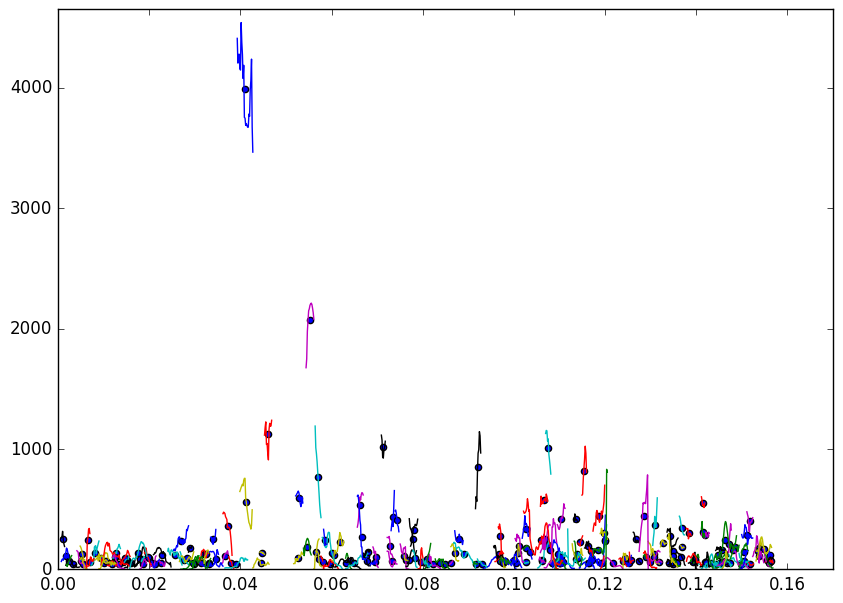

In [43]:
PyPlot.ion()
figure(figsize=(10,7))
#axis("equal")
xlim(0.0,0.170)
ylim(0.0,4650.0)

for p in CadenasPozos
    xxpos=p[:,4]/7022
    timecentro=mean(xxpos)
    yypos=map(x->abs(x), p[:,3])
    gordocentro=mean(yypos)
    plot(xxpos,yypos)
    scatter(timecentro,gordocentro)
end

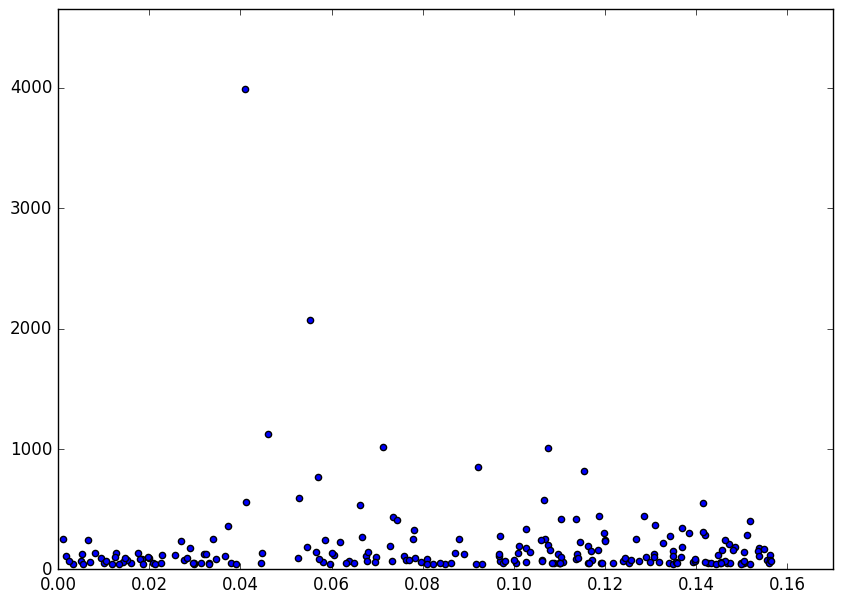

In [44]:
PyPlot.ion()
figure(figsize=(10,7))
#axis("equal")
xlim(0.0,0.170)
ylim(0.0,4650.0)

for p in CadenasPozos
    xxpos=p[:,4]/7022
    timecentro=mean(xxpos)
    yypos=map(x->abs(x), p[:,3])
    gordocentro=mean(yypos)
    #plot(xxpos,yypos)
    scatter(timecentro,gordocentro)
end